# Data Preprocessing Step

Here we implement all possible data preprocessing utils that are going to be used before feature extraction

### Data fields:
- Id
- ResidentStatus
- Education1989Revision
- Education2003Revision
- EducationReportingFlag
- MonthOfDeath
- Sex
- AgeType
- Age
- AgeSubstitutionFlag
- AgeRecode52
- AgeRecode27
- AgeRecode12
- InfantAgeRecode22
- PlaceOfDeathAndDecedentsStatus
- MaritalStatus
- DayOfWeekOfDeath
- CurrentDataYear
- InjuryAtWork
- MannerOfDeath
- MethodOfDisposition
- Autopsy
- ActivityCode
- PlaceOfInjury
- Icd10Code
- CauseRecode358
- CauseRecode113
- InfantCauseRecode130
- CauseRecode39
- NumberOfEntityAxisConditions
- NumberOfRecordAxisConditions
- Race
- BridgedRaceFlag
- RaceImputationFlag
- RaceRecode3
- RaceRecode5
- HispanicOrigin
- HispanicOriginRaceRecode

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
# skipcols = (6, 15, 18, 20, 21, 24)
# usecols = [n for n in range(38) if n not in skipcols]

In [8]:
pd_data = pd.read_csv('data/DeathRecords.csv', index_col=0)

# Education
Categories we extract from the data about education

- 0: Unkown
- 1: 8th grade or less
- 2: 12th grade, no diploma
- 3: high school graduate or GED completed
- 4: some college credit, but no degree, Associate degree
- 5: Bachelor's degree
- 6: Master's degree or higher


In [13]:
# Eduction category

def education_category_89(category):
    if category <= 0:
        return 0
    elif category <= 8:
        return 1
    elif category <= 11:
        return 2
    elif category <= 12:
        return 3
    elif category <= 15:
        return 4
    elif category <= 16:
        return 5
    elif category <= 17:
        return 6
    else:
        return 0

def education_category_03(category):
    if category == 5:
        return 4
    elif category == 6:
        return 5
    elif category == 7 or category == 8:
        return 6
    elif category == 9:
        return 0
    else:
        return category
    

def education_category(record_type, category89, category03):
    if record_type == 0:
        return education_category_89(category89)
    if record_type == 1:
        return education_category_03(category03)

In [18]:
education_categories = pd_data.apply(
    lambda x: education_category(int(x['EducationReportingFlag']),
                                 int(x['Education1989Revision']),
                                 int(x['Education2003Revision'])), axis=1)

In [19]:
from pickle import dump
dump(education_categories, open("education_categories.pickle", "wb"))

In [20]:
#from pickle import load
#education_categories = load(open("education_categories.pickle", "rb"))

### Distribution of the education categories

We see that the most frequent category is the number 3. It corresponds to the high school graduated or GED completed.

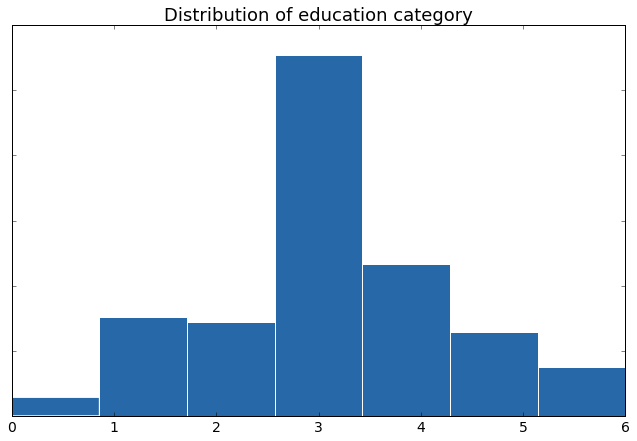

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

ax.hist(education_categories.as_matrix(), bins = 7, color="#2668A8", edgecolor="white")
ax.set_title("Distribution of education category")

ax.set_xticks(np.arange(7))

ax.title.set_fontsize(18)
ax.set_yticklabels([])

for label in (ax.get_xticklabels()):
    label.set_fontsize(14)


pp = PdfPages('beamer/img/edu_hist.pdf')
plt.savefig(pp, format='pdf')
pp.close()

plt.show()


pp = PdfPages('beamer/img/marital_hist.pdf')
plt.savefig(pp, format='pdf')
pp.close()

plt.show()

# Sex
* 0: Male
* 1: Female

In [22]:
def sex_category(sex):
    if sex == 'M':
        return 0
    elif sex == 'F':
        return 1
    else:
        return 2
sex_categories = pd_data.apply(
    lambda x: sex_category(x["Sex"]), axis=1)

dump(sex_categories, open("sex_categories.pickle", "wb"))

In [23]:
#sex_categories = load(open("sex_categories.pickle", "rb"))

### Distribution of the sexes

The distribution is quite uniform. The difference between the two genders is thought to be too small to actually have a meaning here.

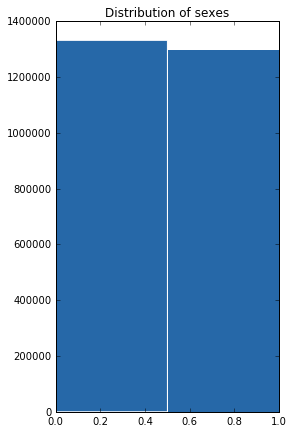

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 7)

plt.hist(sex_categories.as_matrix(), bins = 2, color="#2668A8", edgecolor="white")
plt.title("Distribution of sexes")
pp = PdfPages('beamer/img/sex_hist.pdf')
plt.savefig(pp, format='pdf')
pp.close()

plt.show()

# Age
Age into 27 bins

* 01 : Under 1 month (includes not stated weeks, days, hours, and minutes)
* 02 : 1 month - 11 months (includes not stated months)
* 03 : 1 year
* 04 : 2 years
* 05 : 3 years
* 06 : 4 years
* 07 : 5 -  9 years
* 08 : 10 - 14 years
* 09 :  15 - 19 years
* 10 : 20 - 24 years
* 11 : 25 - 29 years
* 12 : 30 - 34 years
* 13 : 35 - 39 years
* 14 : 40 - 44 years
* 15 : 45 - 49 years
* 16 : 50 - 54 years
* 17 : 55 - 59 years
* 18 : 60 - 64 years
* 19 : 65 - 69 years
* 20 : 70 - 74 years 
* 21 : 75 - 79 years
* 22 : 80 - 84 years
* 23 : 85 - 89 years
* 24 : 90 - 94 years
* 25 : 95 - 99 years
* 26 : 100 years and over
* 27 : Age not stated

### Distribution of the ages

Without surprise, we see that the more frequent death records are for old people. We also see that the most frequent death record for children is under 1 year-old.

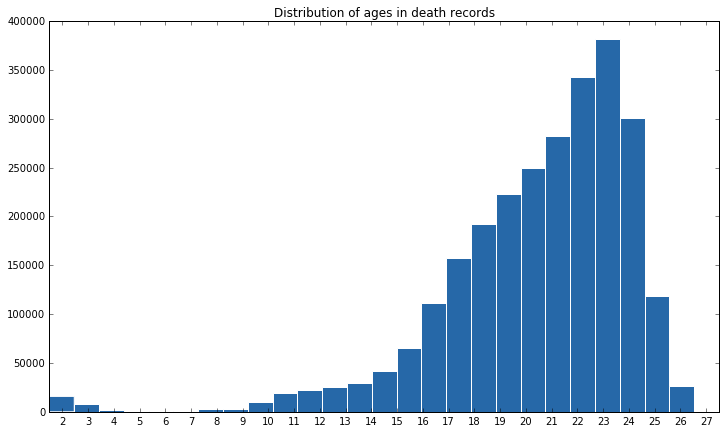

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)

ax.hist(pd_data["AgeRecode27"].as_matrix(), bins = 27, color="#2668A8", edgecolor="white")

ax.set_title("Distribution of ages in death records")

ax.set_xticks(np.arange(27) + 0.5)
ax.set_xticklabels(np.arange(1,28))
ax.set_xlim([1, 27])

pp = PdfPages('beamer/img/age_hist.pdf')
plt.savefig(pp, format='pdf')
pp.close()


plt.show()

# Race
Race encoded into 3 bins

* 1 : White
* 2 : Races other than White or Black
* 3 : Black

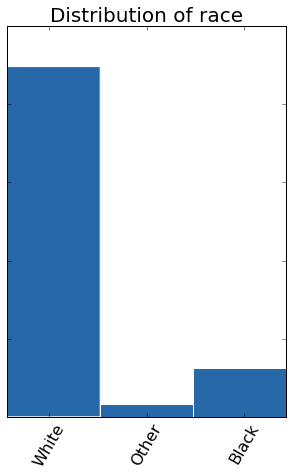

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 7)

ax.hist(pd_data["RaceRecode3"].as_matrix(), bins = 3, color="#2668A8", edgecolor="white")
ax.set_title("Distribution of race")

ax.set_xticks(np.arange(1,4) + [0.3, 0, -0.3])
ax.set_xticklabels(["White", "Other", "Black"], rotation=60)

ax.title.set_fontsize(20)
ax.set_yticklabels([])

for label in (ax.get_xticklabels()):
    label.set_fontsize(16)

pp = PdfPages('beamer/img/race_hist.pdf')
plt.savefig(pp, format='pdf')
pp.close()

plt.show()

# Cause of death
Cause of death into 39 bins.
See http://www.cdc.gov/nchs/data/dvs/Record_Layout_2014.pdf p19.
### Distribution of the causes of death
People more frequently die from:

* Ischemic heart diseases

* Malignant neoplasms of trachea, bronchus and lung and other malignant neoplasms

* Chronic lower respiratory diseases

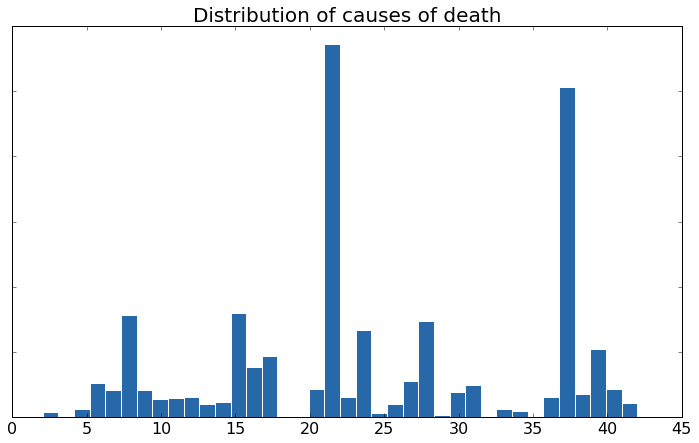

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)

ax.hist(pd_data["CauseRecode39"].as_matrix(), bins = 39, color="#2668A8", edgecolor="white")
ax.set_title("Distribution of causes of death")

ax.title.set_fontsize(20)
ax.set_yticklabels([])

for label in (ax.get_xticklabels()):
    label.set_fontsize(16)

pp = PdfPages('beamer/img/cause_hist.pdf')
plt.savefig(pp, format='pdf')
pp.close()

plt.show()

# Maritial status
* 0 : Never married, single
* 1 : Married
* 2 : Widowed
* 3 : Divorced
* 4 : Marital Status unknown

In [45]:
def status_category(status):
    if status == 'S':
        return 0
    elif status == 'M':
        return 1
    elif status == 'W':
        return 2
    elif status == 'D':
        return 3
    else:
        return 4

status_categories = pd_data.apply(
lambda x: status_category(x["MaritalStatus"]), axis=1)

dump(status_categories, open("status_categories.pickle", "wb"))

In [46]:
#status_categories = load(open("status_categories.pickle", "rb"))

### Distribution of the maritial status

The most frequent categories correspond to the married and widowed people. It is pretty predicatable considering that people mostly die old.

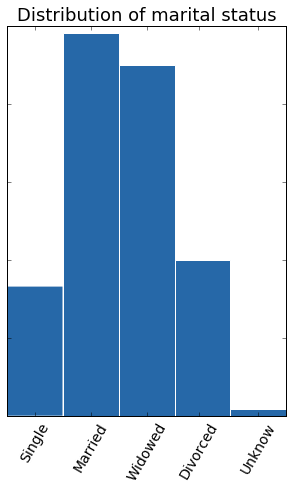

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 7)

ax.hist(status_categories.as_matrix(), bins = 5, color="#2668A8", edgecolor="white")
ax.set_title("Distribution of marital status")


ax.set_xticks(np.arange(5) + [0.4, 0.2, 0, -0.25, -0.4])
ax.set_xticklabels(["Single",
                    "Married",
                    "Widowed",
                    "Divorced",
                    "Unknow"], rotation=60)
ax.title.set_fontsize(18)
ax.set_yticklabels([])

for label in (ax.get_xticklabels()):
    label.set_fontsize(14)

pp = PdfPages('beamer/img/marital_hist.pdf')
plt.savefig(pp, format='pdf')
pp.close()

plt.show()

# Some correlations

* Correlations between months and causes of death
* Correlations between ages and causes of death

In [39]:
plt.cm.Blues

In [40]:
month_cause = pd.pivot_table(pd_data, values='ResidentStatus', index=['MonthOfDeath'],
                  columns=['CauseRecode39'], aggfunc=np.sum)
month_cause.to_csv("month_cause.csv")

In [41]:
normalized_month_cause = month_cause.copy()
for column in month_cause.columns:
    normalized_month_cause[column] = month_cause[column] / sum(month_cause[column])
normalized_month_cause.to_csv("normalized_month_cause.csv")

### Correlations between months and causes of death

At first sight, the causes of death seem uniform over the months.

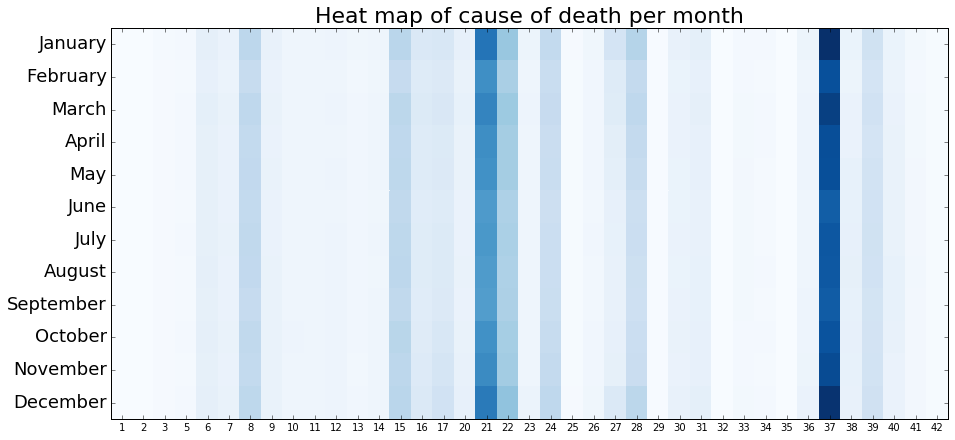

In [42]:

fig, ax = plt.subplots()
heatmap = ax.pcolor(month_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.gca().invert_yaxis()

ax.set_xlim([0,39])
ax.set_xticks(np.arange(39) + 0.5)
ax.set_xticklabels(month_cause.columns)
ax.set_yticks(np.arange(12) + 0.5)
ax.set_yticklabels(["January",
                    "February",
                    "March",
                    "April",
                    "May",
                    "June",
                    "July",
                    "August",
                    "September",
                    "October",
                    "November",
                    "December"])

for label in (ax.get_yticklabels()):
    label.set_fontsize(18)


plt.title("Heat map of cause of death per month")
    
ax.title.set_fontsize(22)

pp = PdfPages('beamer/img/month_cause.pdf')
fig.savefig(pp, format='pdf')
pp.close()

plt.show()

Some correlations appear when he normalize the heat map:
* Strange frequency values for Syphilis, a lot of deaths in March.
* Strange frequency for deaths in pregnancy: a lot of deaths in January and July, but almost nothing in August.
* Deaths from influenza and pneumonia in cold months.
* Frequent deathes from Atherosclerosis and Alzheimer’s disease in December.
* More suicides in August and September.

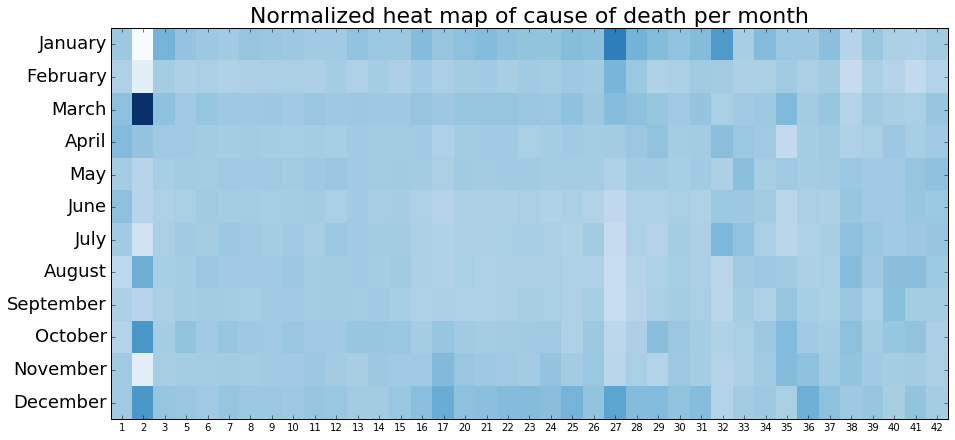

In [43]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(normalized_month_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.gca().invert_yaxis()

ax.set_xlim([0,39])
ax.set_xticks(np.arange(39)+0.5)
ax.set_xticklabels(normalized_month_cause.columns)
ax.set_yticks(np.arange(12)+0.5)
ax.set_yticklabels(["January",
                    "February",
                    "March",
                    "April",
                    "May",
                    "June",
                    "July",
                    "August",
                    "September",
                    "October",
                    "November",
                    "December"])
# plt.title(" heat map of cause of death per month")

for label in (ax.get_yticklabels()):
    label.set_fontsize(18)


plt.title("Normalized heat map of cause of death per month")
    
ax.title.set_fontsize(22)

pp = PdfPages('beamer/img/normalized_month_cause.pdf')
fig.savefig(pp, format='pdf')
pp.close()


plt.show()

In [2]:
age_cause = pd.pivot_table(pd_data, values='ResidentStatus', index=['AgeRecode27'],
                  columns=['CauseRecode39'], aggfunc=np.sum)
age_cause[np.isnan(age_cause)] = 0
age_cause.to_csv("age_cause.csv")

NameError: name 'pd' is not defined

In [51]:
normalized_age_cause = age_cause.copy()
for column in age_cause.columns:
    normalized_age_cause[column] = age_cause[column] / sum(age_cause[column])
normalized_age_cause.to_csv("normalized_age_cause.csv")

### Correlations between age and cause of death

For all the causes, the frequencies seem to increase around
older age.

In [1]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(age_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)

ax.set_ylim([0,27])
ax.set_xlim([0,39])
ax.invert_yaxis()

ax.set_xticks(np.arange(39) + 0.5)
ax.set_xticklabels(age_cause.columns)
ax.set_yticks(np.arange(27) + 0.5)
ax.set_yticklabels(np.arange(len(age_cause.columns)) + 1)


plt.title("Heat map of cause of death per age category")
    
ax.title.set_fontsize(22)

pp = PdfPages('beamer/img/age_cause.pdf')
fig.savefig(pp, format='pdf')
pp.close()

plt.show()

NameError: name 'plt' is not defined

When we normalize the heat map, some correlations appear:
* Deaths from HIV are more frequent for 35 - 59 years.
* Deaths from Alzheimer’s disease are more frequent for 85 - 94 years.
* Deaths during pregnancy are more frequent around 30 - 34 years.
* Motor vehicle accidents are very frequent for 15 - 19 years.

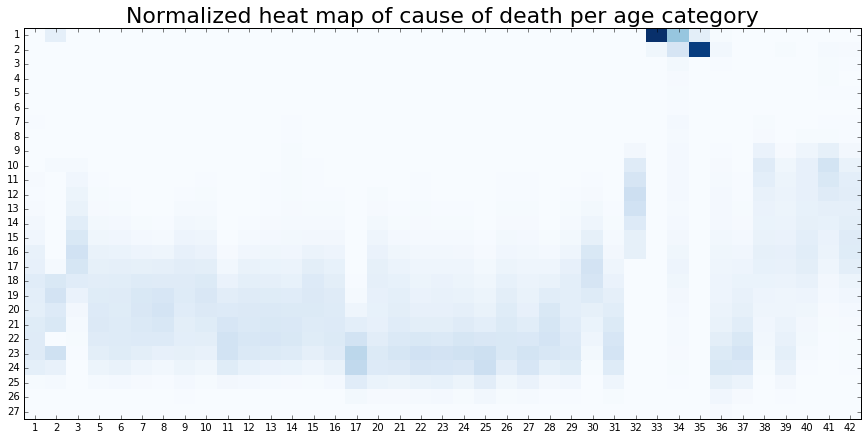

In [53]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(normalized_age_cause, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)

ax.set_ylim([0,27])
ax.set_xlim([0,39])
ax.invert_yaxis()

ax.set_xticks(np.arange(39) + 0.5)
ax.set_xticklabels(age_cause.columns)
ax.set_yticks(np.arange(27) + 0.5)
ax.set_yticklabels(np.arange(len(age_cause.columns)) + 1)


plt.title("Normalized heat map of cause of death per age category")
    
ax.title.set_fontsize(22)

pp = PdfPages('beamer/img/normalized_age_cause.pdf')
fig.savefig(pp, format='pdf')
pp.close()

plt.show()

In [54]:
temp_data = pd_data[(pd_data.ActivityCode != 99) & (pd_data.ActivityCode != 9)]
activity_day_of_week = pd.pivot_table(temp_data, values='ResidentStatus', index=['DayOfWeekOfDeath'],
                  columns=['ActivityCode'], aggfunc=np.sum)
activity_day_of_week[np.isnan(activity_day_of_week)] = 0
activity_day_of_week.to_csv("activity_day_of_week.csv")

In [55]:
normalized_activity_day_of_week = activity_day_of_week.copy()
for column in activity_day_of_week.columns:
    normalized_activity_day_of_week[column] = activity_day_of_week[column] / sum(activity_day_of_week[column])
normalized_activity_day_of_week.to_csv("normalized_activity_day_of_week.csv")

### Correlation between the activity and the day of the week
A few correlations appear at first sight:
* Naturally, people mostly die during frequent activities: leasure and vital activities (eating, sleeping etc).
* Low frequency of death while engaged with sport activities.

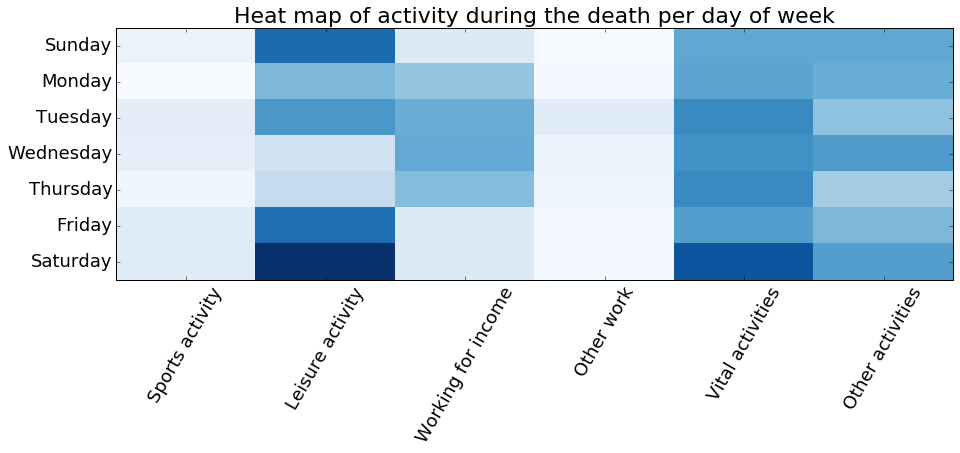

In [56]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(activity_day_of_week, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)

ax.set_ylim([0,7])
ax.set_xlim([0,6])
ax.invert_yaxis()

ax.set_xticks(np.arange(6) + 0.5)
ax.set_xticklabels(["Sports activity",
                    "Leisure activity",
                    "Working for income",
                    "Other work",
                    "Vital activities",
                    "Other activities"], rotation=60)
ax.set_yticks(np.arange(7) + 0.5)
ax.set_yticklabels(["Sunday",
                    "Monday",
                    "Tuesday",
                    "Wednesday",
                    "Thursday",
                    "Friday",
                    "Saturday",
                    "Unknown"])


for label in (ax.get_yticklabels() + ax.get_xticklabels()):
    label.set_fontsize(18)

plt.title("Heat map of activity during the death per day of week")
ax.title.set_fontsize(22)
fig.subplots_adjust(bottom=0.4)

pp = PdfPages('beamer/img/activity_day_of_week.pdf')
fig.savefig(pp, format='pdf')
pp.close()

plt.show()

When we normalize the heat map, other correlations appear:
* Death registered while engaged in leasure activity are more freqent during week-ends (specially Saturday).
* Death during the sport activities are more frequent on Friday and Saturday.
* Death registered while engaged with other work are strangely more frequent on Tuesday.

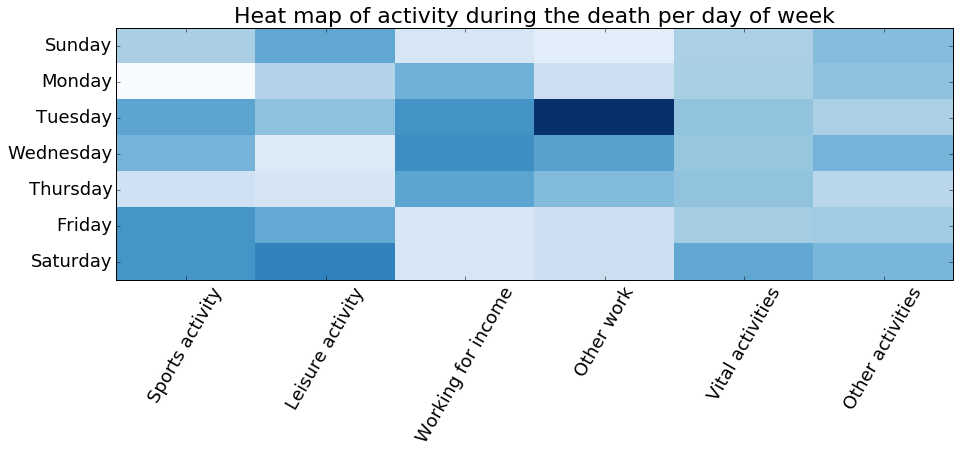

In [255]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(normalized_activity_day_of_week, cmap=plt.cm.Blues)

fig = plt.gcf()
fig.set_size_inches(15, 7)

ax.set_ylim([0,7])
ax.set_xlim([0,6])
ax.invert_yaxis()

ax.set_xticks(np.arange(6) + 0.5)
ax.set_xticklabels(["Sports activity",
                    "Leisure activity",
                    "Working for income",
                    "Other work",
                    "Vital activities",
                    "Other activities"], rotation=60)
ax.set_yticks(np.arange(7) + 0.5)
ax.set_yticklabels(["Sunday",
                    "Monday",
                    "Tuesday",
                    "Wednesday",
                    "Thursday",
                    "Friday",
                    "Saturday",
                    "Unknown"])

fig.subplots_adjust(bottom=0.4)
for label in (ax.get_yticklabels() + ax.get_xticklabels()):
    label.set_fontsize(18)

plt.title("Heat map of activity during the death per day of week")
ax.title.set_fontsize(22)

pp = PdfPages('beamer/img/normalized_activity_day_of_week.pdf')
fig.savefig(pp, format='pdf')
pp.close()

plt.show()